In [1]:
library(asaur)
library(survival)
library(ggplot2)
library(reshape2)
library(patchwork)
library(survminer)

Warning message:
"package 'asaur' was built under R version 4.0.3"
Warning message:
"package 'survival' was built under R version 4.0.5"
Warning message:
"replacing previous import 'lifecycle::last_warnings' by 'rlang::last_warnings' when loading 'tibble'"
Warning message:
"replacing previous import 'ellipsis::check_dots_unnamed' by 'rlang::check_dots_unnamed' when loading 'tibble'"
Warning message:
"replacing previous import 'ellipsis::check_dots_used' by 'rlang::check_dots_used' when loading 'tibble'"
Warning message:
"replacing previous import 'ellipsis::check_dots_empty' by 'rlang::check_dots_empty' when loading 'tibble'"
Warning message:
"package 'survminer' was built under R version 4.0.5"
Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 4.0.3"

Attaching package: 'survminer'


The following object is masked from 'package:survival':

    myeloma




In [23]:
data=read.csv("cleaned_data.csv")

data <- data[, !names(data) %in% c("icustay_id", "subject_id","hadm_id", "intime", "outtime", 
                                   "dbsource", "suspected_infection_time_poe", 
                                   "antibiotic_time_poe", "blood_culture_time", 
                                   "gender", "ethnicity", "hosp_los", 
                                   "specimen_poe", "first_service")]

# Replace NA values in 'colloid_bolus' with 0
data$colloid_bolus[is.na(data$colloid_bolus)] <- 0

# Replace NA values in other columns with the column mean
data <- data.frame(lapply(data, function(x) {
  if(is.numeric(x)) {
    x[is.na(x)] <- mean(x, na.rm = TRUE)
  }
  return(x)
}))

data$icu_los[data$icu_los > 30] <- 30  #?


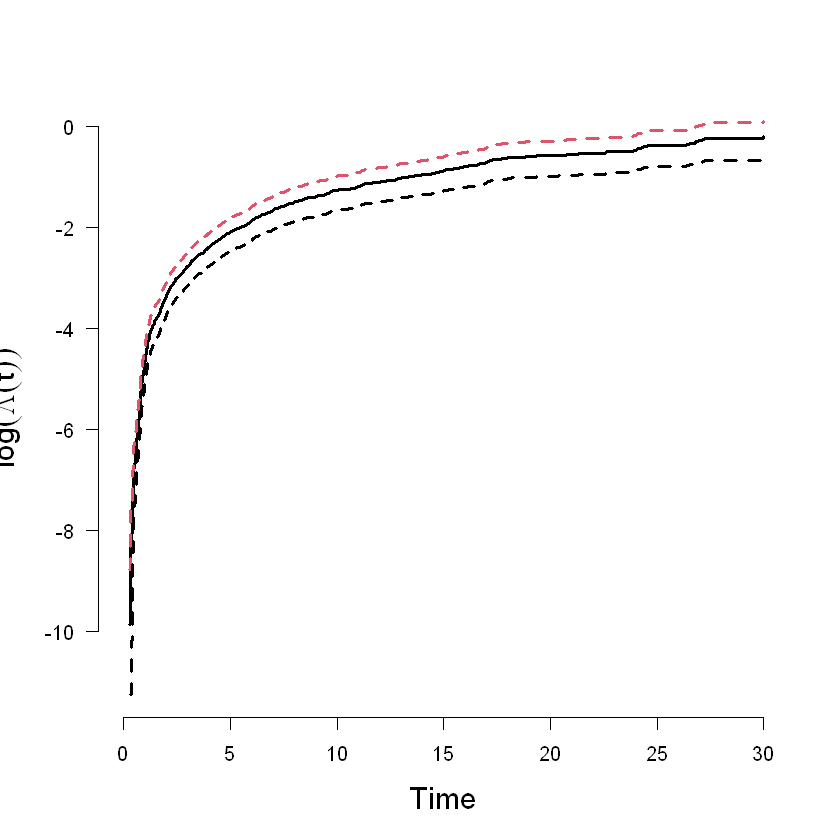

In [24]:
fit<- coxph(Surv(icu_los,thirtyday_expire_flag)~.,data=data)
sfit<- survfit((fit)) 
plot(sfit,fun=function(x) log(-log(x)),bty='n',las=1,lwd=3,col=1:2,xlab='Time',ylab = expression(log(Lambda(t))),cex.lab=1.5)

zp0 <- cox.zph(fit, transform='identity')


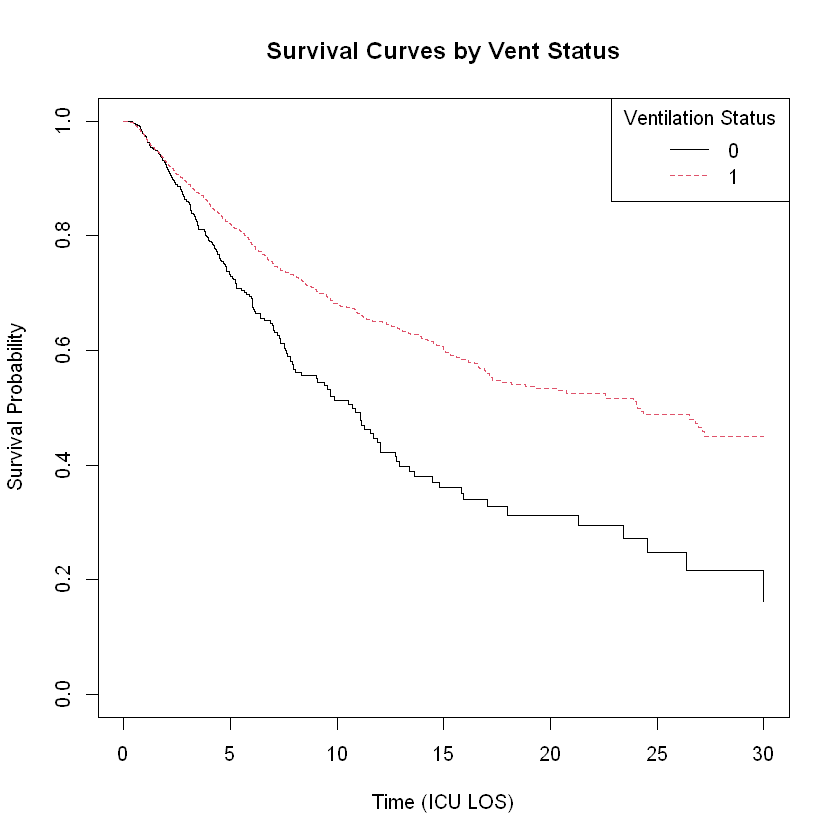

In [27]:
survfunc=survfit(formula = Surv(icu_los,thirtyday_expire_flag) ~ strata(data$vent), data= data,ctype=1,conf.type="plain")
plot(survfunc, 
     col = c(1, 2),           
     lty = 1:2,              
     xlab = "Time (ICU LOS)",  
     ylab = "Survival Probability", 
     main = "Survival Curves by Vent Status") 

legend("topright", 
       legend = levels(as.factor(data$vent)), 
       col = c(1, 2), 
       lty = 1:2, 
       title = "Ventilation Status")


In [25]:
summary(fit)

Call:
coxph(formula = Surv(icu_los, thirtyday_expire_flag) ~ ., data = data)

  n= 4559, number of events= 889 

                                        coef  exp(coef)   se(coef)      z
suspected_infection_time_poe_days  1.578e-01  1.171e+00  1.347e-01  1.172
positiveculture_poe                5.222e-02  1.054e+00  1.128e-01  0.463
blood_culture_positive            -1.641e-01  8.486e-01  8.738e-02 -1.879
age                                1.518e-02  1.015e+00  2.796e-03  5.428
is_male                            1.528e-01  1.165e+00  8.155e-02  1.873
race_white                         6.543e-02  1.068e+00  9.049e-02  0.723
race_black                        -6.752e-02  9.347e-01  1.698e-01 -0.398
race_hispanic                      6.694e-02  1.069e+00  2.736e-01  0.245
race_other                                NA         NA  0.000e+00     NA
metastatic_cancer                  5.660e-01  1.761e+00  1.204e-01  4.702
diabetes                          -4.275e-02  9.581e-01  9.075e-02 -0.471